In [3]:
from denoiser import pretrained
from denoiser.dsp import convert_audio
import torchaudio
import torch
import librosa
import numpy as np
from IPython.display import display, Audio

In [4]:
model = pretrained.dns64()
wav, sr = torchaudio.load('new.wav')

wav = convert_audio(wav, sr, model.sample_rate, model.chin)

with torch.no_grad():
    denoised = model(wav[None])[0]

display(Audio(denoised, rate=model.sample_rate))

In [8]:
denoised_np = denoised.squeeze().numpy()
wav_np = wav.squeeze().numpy()

S_denoised, phase0 = librosa.magphase(librosa.stft(denoised_np))
S_wav, phase1 = librosa.magphase(librosa.stft(wav_np))

y_new = librosa.istft((S_wav-S_denoised)*phase1)

display(Audio(y_new, rate=model.sample_rate))

In [9]:
from scipy.spatial.distance import cosine

dist = []
for i in range(0, len(S_wav)):
    dist.append(cosine(S_wav[i], S_denoised[i]))

#np.mean(dist), np.max(dist), np.min(dist)

(0.597083019025442, 0.8999946340918541, 0.062345683574676514)

In [16]:
S_new = S_wav
for i in range(0, len(dist)):
    if dist[i]<0.5:
        S_new[i] = np.zeros(S_wav[i].shape, S_wav[i].dtype)

y_new = librosa.istft(S_new*phase1)
display(Audio(y_new, rate=model.sample_rate))

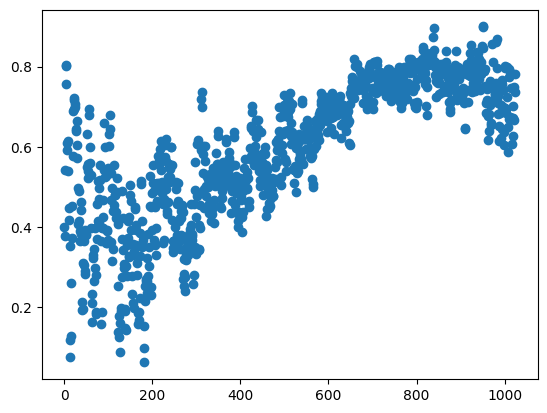

In [10]:
import matplotlib.pyplot as plt

plt.scatter([i for i in range(0, len(dist))], dist)
plt.show()